In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_excel(r'C:\Users\KIIT\OneDrive\Documents\Project n Paper\BrainStroke Prediction\usefile.xlsx')

In [4]:
df.head(5)

Gender Index   Age  Hypertension  Heart Disease  Martial Status  \
0             0   3.0             0              0               0   
1             0  58.0             1              0               1   
2             1   8.0             0              0               0   
3             1  70.0             0              0               1   
4             1  47.0             0              0               1   

   Work Type Index  Residence Type  Average Glucose Level   BMI  \
0                0               0                  95.12  18.0   
1                2               1                  87.96  39.2   
2                2               1                 110.89  17.6   
3                2               0                  69.04  35.9   
4                2               1                 210.95  50.1   

   Smoking Status Index  Stroke  
0                     0       0  
1                     0       0  
2                     0       0  
3                     1       0  
4                     0       0

In [5]:
train_set, temp_set  = train_test_split(df,test_size = 0.2)

In [6]:
train_set.shape

(34720, 11)

In [7]:
temp_set.shape

(8680, 11)

In [8]:
test_set, valid_set = train_test_split(temp_set, test_size = 0.5)

In [9]:
test_set.shape

(4340, 11)

In [10]:
valid_set.shape

(4340, 11)

In [11]:
print(f"Train set size : {train_set.shape}")
print(f"Valid set size : {valid_set.shape}")
print(f"Test set size : {test_set.shape}")

Train set size : (34720, 11)
Valid set size : (4340, 11)
Test set size : (4340, 11)


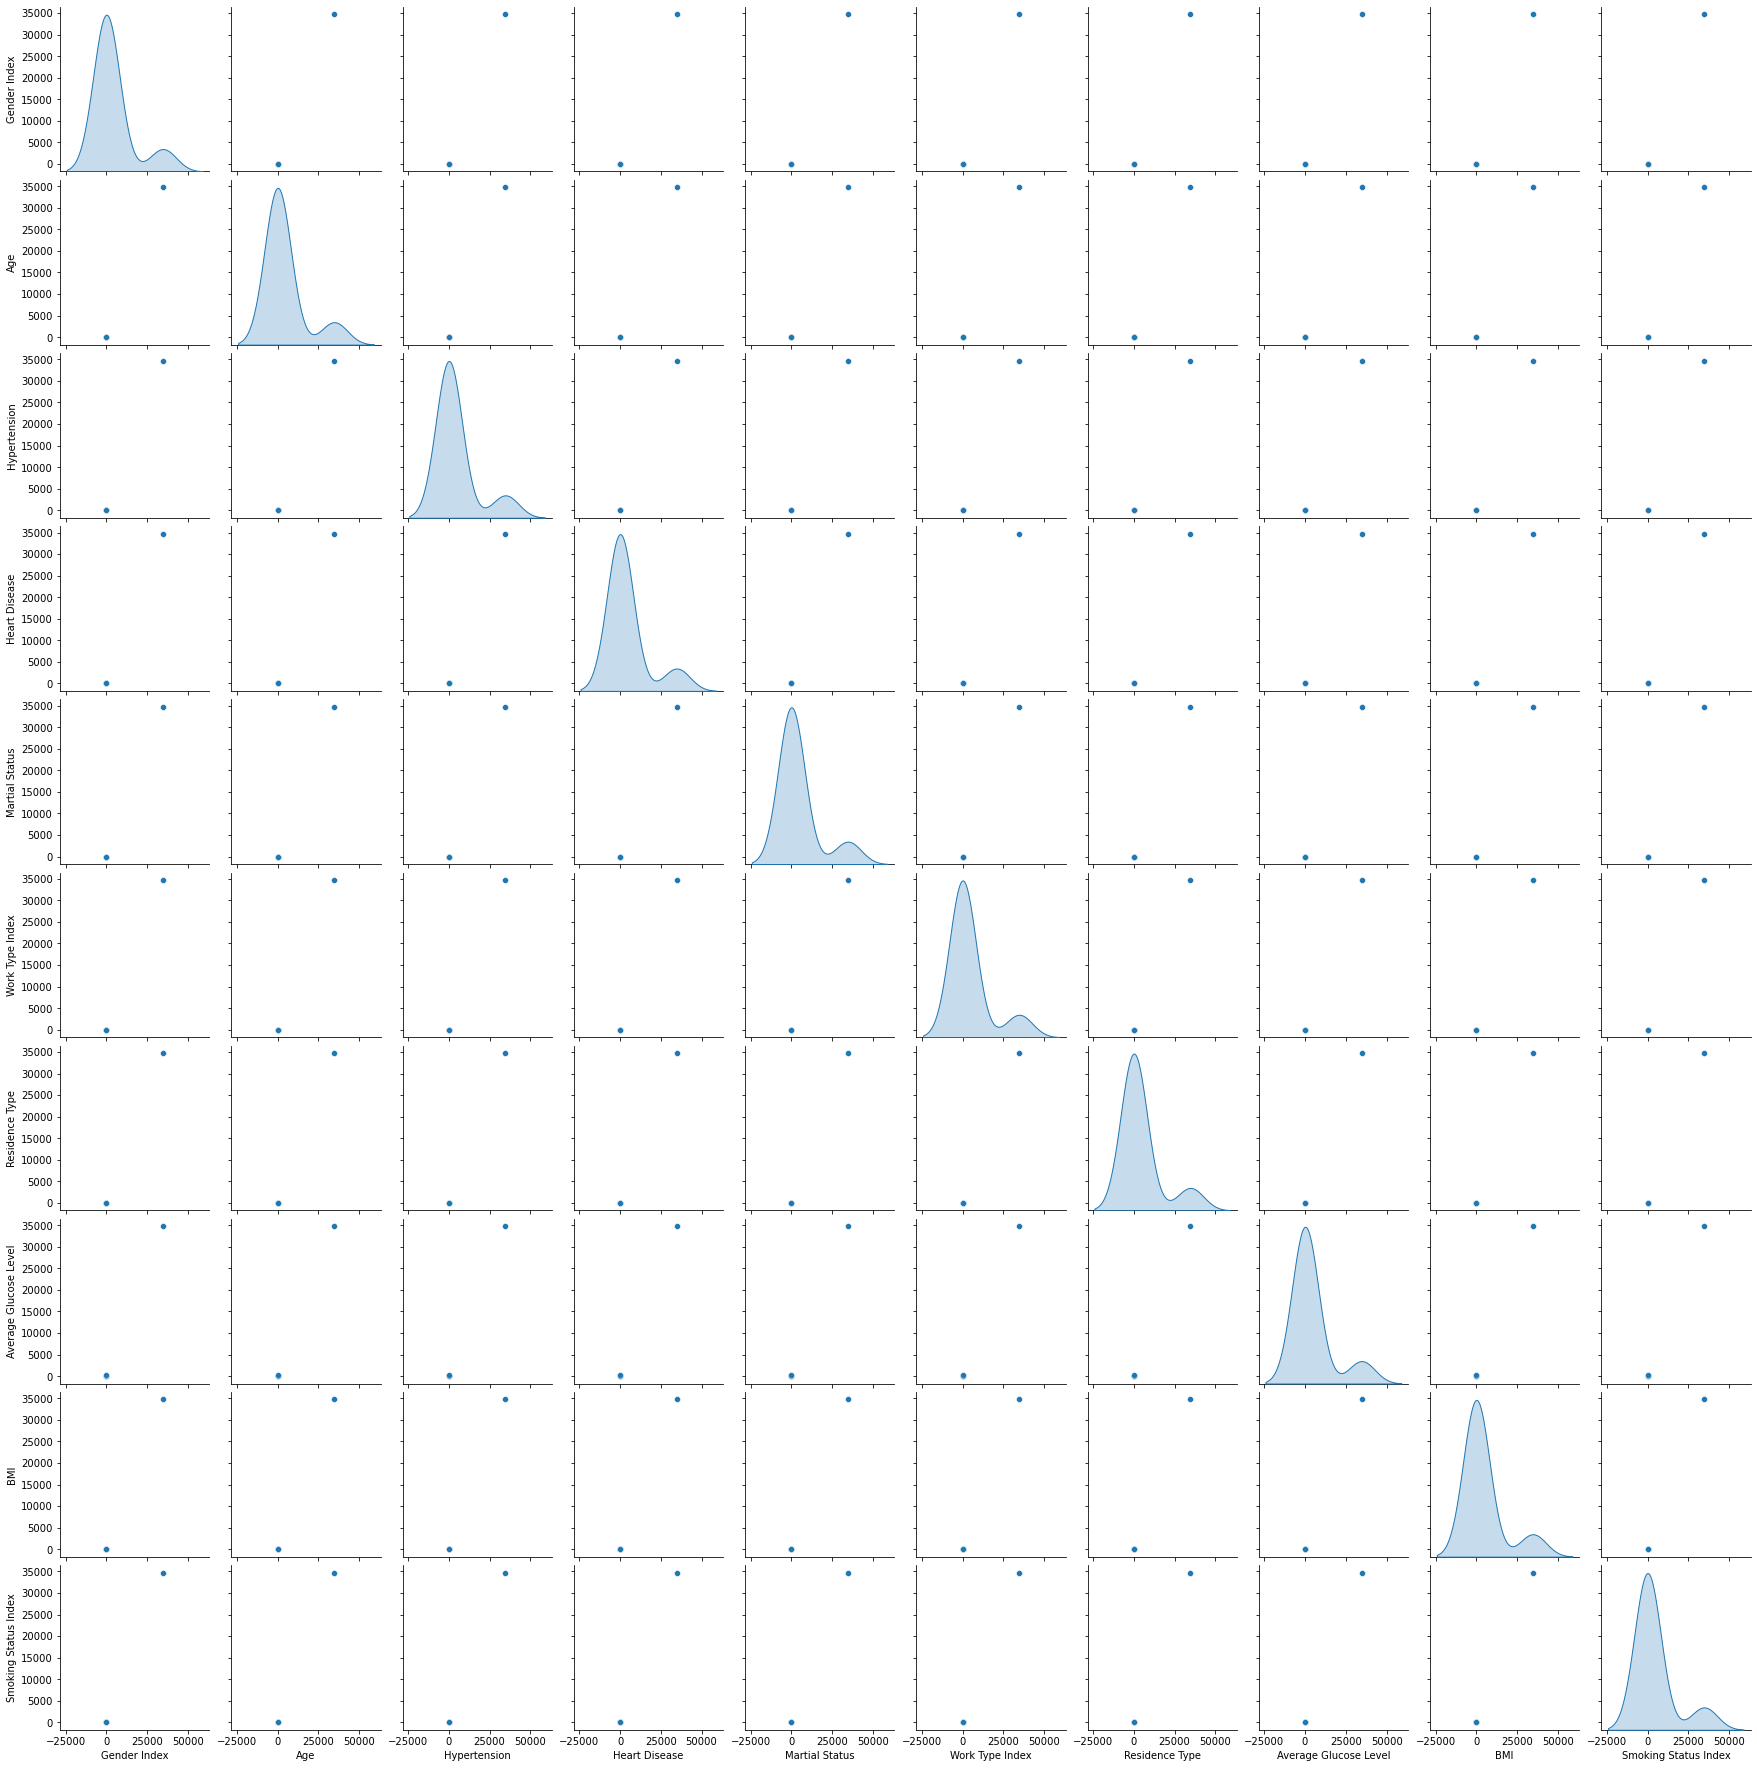

In [12]:
#plot relationship between each variable in train set to check incorrectness
train_plot = train_set.describe()
train_plot.pop('Stroke')
sns.pairplot(train_plot[train_plot.columns], diag_kind="kde")

In [13]:
#features description
train_stats = train_set.describe().transpose()[:10]
train_stats

count        mean        std    min    25%     50%  \
Gender Index           34720.0    0.592051   0.492046   0.00   0.00   1.000   
Age                    34720.0   42.240310  22.523181   0.08  24.00  44.000   
Hypertension           34720.0    0.094614   0.292685   0.00   0.00   0.000   
Heart Disease          34720.0    0.047552   0.212819   0.00   0.00   0.000   
Martial Status         34720.0    0.643779   0.478889   0.00   0.00   1.000   
Work Type Index        34720.0    2.118952   1.102442   0.00   2.00   2.000   
Residence Type         34720.0    0.501642   0.500005   0.00   0.00   1.000   
Average Glucose Level  34720.0  104.464152  43.151568  55.00  77.53  91.535   
BMI                    34720.0   28.589268   7.681485  10.10  23.40  27.700   
Smoking Status Index   34720.0    0.476152   0.743110   0.00   0.00   0.000   

                          75%     max  
Gender Index             1.00    2.00  
Age                     60.00   82.00  
Hypertension             0.00    1.00  
Heart Disease            0.00    1.00  
Martial Status           1.00    1.00  
Work Type Index          3.00    4.00  
Residence Type           1.00    1.00  
Average Glucose Level  112.05  291.05  
BMI                     32.70   97.60  
Smoking Status Index     1.00    2.00

## Normalisation and Validation

In [14]:
#Remove target labels
train_label = train_set.pop('Stroke')
valid_label = valid_set.pop('Stroke')
test_label = test_set.pop('Stroke')

In [138]:
train_label

11901    0
5222     0
7424     0
6863     0
14336    0
        ..
8067     0
37009    0
23786    0
22503    0
27137    0
Name: Stroke, Length: 34720, dtype: int64

In [15]:
print(df['Stroke'].value_counts()[1])

783


In [16]:
c1 = 0
for x in train_label :
    if x == 1:
        c1 += 1
c2 = 0
for x in valid_label :
    if x == 1:
        c2 += 1
c3 = 0
for x in test_label :
    if x == 1:
        c3 += 1
print(c1,c2,c3)

618 84 81


In [17]:
#Normalisation _ z_score

def norm_z_score(x):
    output = (x - train_stats['mean'])/(train_stats['std'])
    return output

In [18]:
norm_train = norm_z_score(train_set)
norm_valid = norm_z_score(valid_set)
norm_test = norm_z_score(test_set)

In [19]:
test_set

Gender Index   Age  Hypertension  Heart Disease  Martial Status  \
3796              1  52.0             0              0               1   
12585             1  50.0             0              1               1   
3216              1  26.0             0              0               1   
11410             1  32.0             0              0               1   
13409             1  80.0             0              0               1   
...             ...   ...           ...            ...             ...   
30427             1  40.0             0              0               1   
11605             1  65.0             0              0               1   
15293             1  33.0             0              0               0   
17386             1   4.0             0              0               0   
9871              1  13.0             0              0               0   

       Work Type Index  Residence Type  Average Glucose Level   BMI  \
3796                 2               0                 200.46  25.0   
12585                2               0                 186.68  47.3   
3216                 2               0                  88.79  24.9   
11410                2               0                  83.53  22.2   
13409                2               1                  71.58  24.9   
...                ...             ...                    ...   ...   
30427                2               0                 139.25  26.1   
11605                4               0                 105.85  45.7   
15293                4               1                 100.51  26.2   
17386                0               0                  81.79  17.3   
9871                 2               1                  81.87  26.6   

       Smoking Status Index  
3796                      0  
12585                     0  
3216                      0  
11410                     0  
13409                     0  
...                     ...  
30427                     1  
11605                     1  
15293                     1  
17386                     0  
9871                      0  

[4340 rows x 10 columns]

In [20]:
#Z_score of train_set
norm_train.head(10)

Gender Index       Age  Hypertension  Heart Disease  Martial Status  \
11901      0.829087  0.211324     -0.323262      -0.223438        0.743850   
5222      -1.203242 -1.342631     -0.323262      -0.223438       -1.344319   
7424      -1.203242 -1.298232     -0.323262      -0.223438       -1.344319   
6863       0.829087 -1.342631     -0.323262      -0.223438       -1.344319   
14336      0.829087  0.522115     -0.323262      -0.223438        0.743850   
26340      0.829087 -0.809846     -0.323262      -0.223438       -1.344319   
14152      0.829087 -0.587853     -0.323262      -0.223438       -1.344319   
35501     -1.203242  1.188096     -0.323262       4.475388        0.743850   
6949      -1.203242  1.232494      3.093377      -0.223438        0.743850   
40993      0.829087  1.143697     -0.323262      -0.223438        0.743850   

       Work Type Index  Residence Type  Average Glucose Level       BMI  \
11901        -0.107898       -1.003274              -0.121297 -0.714610   
5222         -1.922052       -1.003274              -0.477252 -1.092142   
7424         -1.922052        0.996708              -0.341915 -1.521746   
6863         -1.922052        0.996708               0.386680 -0.128786   
14336         1.706256       -1.003274               0.119482 -0.753665   
26340        -0.107898        0.996708              -0.194759 -0.779702   
14152        -0.107898        0.996708              -0.419548 -0.636500   
35501        -0.107898       -1.003274               0.447860  0.574203   
6949          0.799179       -1.003274               0.447860 -0.271988   
40993        -0.107898        0.996708               0.152158 -0.115768   

       Smoking Status Index  
11901             -0.640756  
5222              -0.640756  
7424              -0.640756  
6863              -0.640756  
14336             -0.640756  
26340              0.704940  
14152              0.704940  
35501              0.704940  
6949               2.050636  
40993              0.704940

## Model 

In [21]:
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [22]:
svm_model = svm.SVC(kernel='poly', degree=2, gamma='auto', C=5)
svm_model

SVC(C=5, degree=2, gamma='auto', kernel='poly')

In [23]:
svm_model.fit(norm_train, train_label)

SVC(C=5, degree=2, gamma='auto', kernel='poly')

In [24]:
y_pred_train = svm_model.predict(norm_train)

In [25]:
print(f"Model Training Accuracy : {accuracy_score(train_label, y_pred_train)*100:.4f}")

Model Training Accuracy : 98.2200


In [26]:
y_pred_valid = svm_model.predict(norm_valid)

In [27]:
#Cross validation identifies all data points has been identified correctly.
print(f"Model Validation Accuracy : {accuracy_score(valid_label, y_pred_valid)*100:.4f}")

Model Validation Accuracy : 98.0645


In [28]:
y_pred_test = svm_model.predict(norm_test)

In [29]:
print(f"Model Testing Accuracy : {accuracy_score(test_label, y_pred_test)*100:.4f}")

Model Testing Accuracy : 98.1336


## Normalization of only numerical columns (removing binary columns)

In [30]:
train_set.shape

(34720, 10)

In [31]:
valid_set.shape

(4340, 10)

In [32]:
test_set.shape

(4340, 10)

In [120]:
train_set1 = train_set[['Age','Average Glucose Level','BMI']]
valid_set1 = valid_set[['Age','Average Glucose Level','BMI']]
test_set1 = test_set[['Age','Average Glucose Level','BMI']]

In [125]:
train_set_temp = []
for x in train_set:
    if x not in train_set1:
        train_set_temp.append(x)
train_set2 = train_set[train_set_temp]

In [128]:
valid_set_temp = []
for x in valid_set:
    if x not in valid_set1:
        valid_set_temp.append(x)
valid_set2 = valid_set[valid_set_temp]

In [129]:
test_set_temp = []
for x in test_set:
    if x not in test_set1:
        test_set_temp.append(x)
test_set2 = test_set[test_set_temp]

In [121]:
train_stat_new = train_set1.describe().transpose()[:10]
train_stat_new

count        mean        std    min    25%     50%  \
Age                    34720.0   42.240310  22.523181   0.08  24.00  44.000   
Average Glucose Level  34720.0  104.464152  43.151568  55.00  77.53  91.535   
BMI                    34720.0   28.589268   7.681485  10.10  23.40  27.700   

                          75%     max  
Age                     60.00   82.00  
Average Glucose Level  112.05  291.05  
BMI                     32.70   97.60

In [122]:
#Normalisation _ z_score1

def norm_z_score1(x):
    output = (x - train_stat_new['mean'])/(train_stat_new['std'])
    return output

In [123]:
norm_train1 = norm_z_score1(train_set1)
norm_valid1 = norm_z_score1(valid_set1)
norm_test1 = norm_z_score1(test_set1)

In [131]:
norm_train1

Age  Average Glucose Level       BMI
11901  0.211324              -0.121297 -0.714610
5222  -1.342631              -0.477252 -1.092142
7424  -1.298232              -0.341915 -1.521746
6863  -1.342631               0.386680 -0.128786
14336  0.522115               0.119482 -0.753665
...         ...                    ...       ...
8067  -0.632251               0.454117 -1.040068
37009 -0.987441              -0.303677  1.394357
23786  0.388919              -0.602855 -0.584427
22503 -0.898644              -0.587329  1.238137
27137  0.744108               0.132923  1.303229

[34720 rows x 3 columns]

In [132]:
final_train = norm_train1.join(train_set2)
final_train

Age  Average Glucose Level       BMI  Gender Index  Hypertension  \
11901  0.211324              -0.121297 -0.714610             1             0   
5222  -1.342631              -0.477252 -1.092142             0             0   
7424  -1.298232              -0.341915 -1.521746             0             0   
6863  -1.342631               0.386680 -0.128786             1             0   
14336  0.522115               0.119482 -0.753665             1             0   
...         ...                    ...       ...           ...           ...   
8067  -0.632251               0.454117 -1.040068             0             0   
37009 -0.987441              -0.303677  1.394357             0             0   
23786  0.388919              -0.602855 -0.584427             1             0   
22503 -0.898644              -0.587329  1.238137             0             0   
27137  0.744108               0.132923  1.303229             0             0   

       Heart Disease  Martial Status  Work Type Index  Residence Type  \
11901              0               1                2               0   
5222               0               0                0               0   
7424               0               0                0               1   
6863               0               0                0               1   
14336              0               1                4               0   
...              ...             ...              ...             ...   
8067               0               1                3               0   
37009              0               0                2               0   
23786              0               1                2               0   
22503              0               0                2               0   
27137              0               1                2               1   

       Smoking Status Index  
11901                     0  
5222                      0  
7424                      0  
6863                      0  
14336                     0  
...                     ...  
8067                      0  
37009                     0  
23786                     0  
22503                     2  
27137                     0  

[34720 rows x 10 columns]

In [135]:
final_valid = norm_valid1.join(valid_set2)
final_valid

Age  Average Glucose Level       BMI  Gender Index  Hypertension  \
17518  0.166925              -0.096269  0.079507             1             0   
12642 -0.454656              -0.372968  0.899661             0             0   
21898  1.454488              -0.744449 -0.115768             1             1   
14919 -0.188264              -0.186416  0.912679             1             0   
13317 -1.564624               0.573927 -0.115768             1             0   
...         ...                    ...       ...           ...           ...   
3505  -1.742219              -0.274478 -1.717021             1             0   
675    1.188096              -0.398459 -0.688574             1             0   
40229 -0.676650              -0.110869  1.303229             1             0   
20645  0.078128               2.513833 -0.115768             1             0   
23303  0.078128               0.008942  1.029844             1             0   

       Heart Disease  Martial Status  Work Type Index  Residence Type  \
17518              0               1                2               1   
12642              0               0                2               0   
21898              0               1                2               0   
14919              0               1                2               0   
13317              0               0                0               1   
...              ...             ...              ...             ...   
3505               0               0                0               1   
675                0               1                2               0   
40229              0               0                2               1   
20645              1               1                2               0   
23303              0               1                2               1   

       Smoking Status Index  
17518                     0  
12642                     0  
21898                     2  
14919                     0  
13317                     0  
...                     ...  
3505                      0  
675                       2  
40229                     2  
20645                     0  
23303                     0  

[4340 rows x 10 columns]

In [136]:
final_test = norm_test1.join(test_set2)
final_test

Age  Average Glucose Level       BMI  Gender Index  Hypertension  \
3796   0.433318               2.224620 -0.467262             1             0   
12585  0.344520               1.905281  2.435822             1             0   
3216  -0.721049              -0.363235 -0.480281             1             0   
11410 -0.454656              -0.485131 -0.831775             1             0   
13409  1.676481              -0.762062 -0.480281             1             0   
...         ...                    ...       ...           ...           ...   
30427 -0.099467               0.806132 -0.324061             1             0   
11605  1.010501               0.032116  2.227529             1             0   
15293 -0.410258              -0.091634 -0.311043             1             0   
17386 -1.697820              -0.525454 -1.469673             1             0   
9871  -1.298232              -0.523600 -0.258969             1             0   

       Heart Disease  Martial Status  Work Type Index  Residence Type  \
3796               0               1                2               0   
12585              1               1                2               0   
3216               0               1                2               0   
11410              0               1                2               0   
13409              0               1                2               1   
...              ...             ...              ...             ...   
30427              0               1                2               0   
11605              0               1                4               0   
15293              0               0                4               1   
17386              0               0                0               0   
9871               0               0                2               1   

       Smoking Status Index  
3796                      0  
12585                     0  
3216                      0  
11410                     0  
13409                     0  
...                     ...  
30427                     1  
11605                     1  
15293                     1  
17386                     0  
9871                      0  

[4340 rows x 10 columns]

## Model New 

In [148]:
svm_model2 = svm.SVC(kernel='poly', degree=3, gamma='auto', C=5)
svm_model2

SVC(C=5, gamma='auto', kernel='poly')

In [149]:
svm_model2.fit(final_train, train_label)

SVC(C=5, gamma='auto', kernel='poly')

In [150]:
y_pred_train1 = svm_model2.predict(final_train)

In [151]:
print(f"Model Training Accuracy : {accuracy_score(train_label, y_pred_train1)*100:.4f}")

Model Training Accuracy : 98.2200


In [152]:
y_pred_valid1 = svm_model2.predict(final_valid)

In [153]:
print(f"Model Validation Accuracy : {accuracy_score(valid_label, y_pred_valid1)*100:.4f}")

Model Validation Accuracy : 98.0645


In [154]:
y_pred_test1 = svm_model2.predict(final_test)

In [155]:
print(f"Model Testing Accuracy : {accuracy_score(test_label, y_pred_test1)*100:.4f}")

Model Testing Accuracy : 98.1336
